In [1]:
### Extract MSD∆ along time
### YYE @ oct. 2023
import math


import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

In [2]:
## 24/10/2023 night.
def obtaindata(filename):
    # Open the text file for reading
    with open(filename, 'r') as file:
        # Initialize a variable to track the current section
        current_section = None
        # Initialize a dictionary to store the data for each section
        data = {}

        # Iterate through each line in the file
        for line in file:
            # Check if the line contains an index marker (e.g., "#   1")
            if line.startswith("Time"): ## Added spaces manually.
                # Initialize a list for the current section
                data = []
                current_section = 1
            elif current_section is not None:
                # Split the line by the comma to separate the two values
                values = line.strip().split('   ')
                if (not(values == [''])): ## Avoid blank line. Added manually
                    # Convert the values to the appropriate data types (float, float)
                    time = float(values[0].strip())
                    #sumz = float(values[1].strip())
                    msdz = float(values[2].strip())  # Remove space from the probability. Added manually.
                    # Add the values as a pair (position, probability) to the data for the current section
                    data.append((time, msdz))

    # Now, you have your data stored in a dictionary as described in the previous response.
    return data

In [11]:
### Define files' parameters.

num_file = 9

path_absolu = "sim-MSDr1/"
#path_absolu = "sim-MSD/"

num_tdis = 6000
#num_tdis = 38

suffix = "-d_0-MSD.txt"

In [12]:
%%time
### Extract all data.
msd_temps = np.zeros(num_tdis)
msd_total = np.zeros(((num_file,num_tdis)))

for i in range(num_file):
    name = path_absolu+"k_"+str(i)+suffix
    int_data = obtaindata(name)
    for j in range(num_tdis):
        if (i==0):
            msd_temps[j] = int_data[j][0]
        msd_total[i,j] = int_data[j][1]
    
### END 


CPU times: user 115 ms, sys: 11.5 ms, total: 126 ms
Wall time: 133 ms


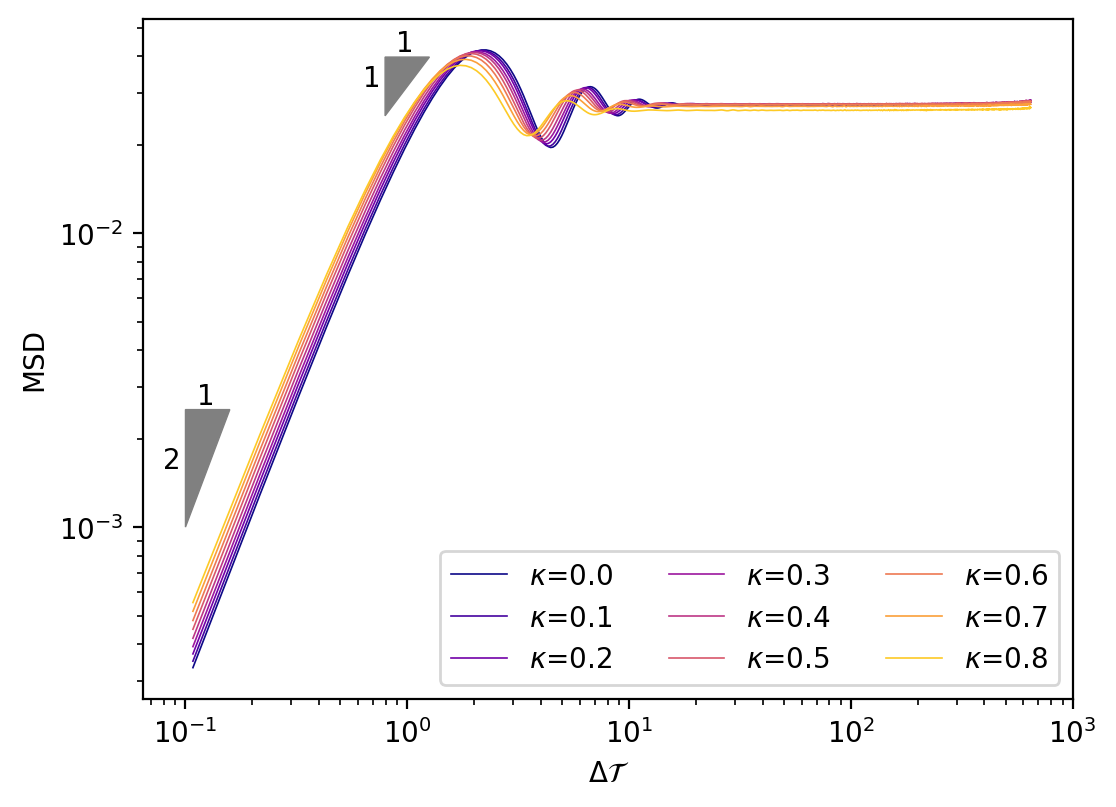

In [13]:
plt.figure(figsize=(6, 4.5), dpi=200)
plt.xlabel(r'$\Delta \mathcal{T}$')
plt.ylabel("MSD")
plt.xscale('log')
plt.yscale('log')

ratio = 10**(0.1)
coord_x = [10**(-1.0), 10**(-0.8), 10**(-1.0)]
coord_y = [10**(-3.0), 10**(-2.6), 10**(-2.6)]
plt.fill(coord_x, coord_y, c="gray", lw=0.5)
plt.text(10**(-0.95), 10**(-2.58), "1")
plt.text(10**(-1.1), 10**(-2.8), "2")


coord_x = [10**(-0.1), 10**(0.1), 10**(-0.1)]
coord_y = [10**(-1.6), 10**(-1.4), 10**(-1.4)]
plt.fill(coord_x, coord_y, c="gray", lw=0.5)
plt.text(10**(-0.05), 10**(-1.38), "1")
plt.text(10**(-0.2), 10**(-1.5), "1")

# Get a list of different colormaps
colormaps = [ plt.get_cmap('plasma')]

for i in range(num_file):
    # Choose a colormap for this curve (cyclically from the list)
    colormap = colormaps[i % len(colormaps)]
    
    # Get the color for this curve
    color = colormap(i / num_file)  # Adjust color based on position in the loop
    
    plt.plot(msd_temps, msd_total[i][:], label=r'$\kappa$' + "=0." + str(i), color=color, linewidth=0.6)

plt.legend(ncol=3)
plt.show

plt.savefig("MSDz.pdf",  dpi='figure', format=None, metadata=None,bbox_inches=None, pad_inches=0.1,backend=None)

In [14]:
msd_temps

array([1.0805000e-01, 2.1610000e-01, 3.2415000e-01, ..., 6.4807782e+02,
       6.4818587e+02, 6.4829391e+02])

In [15]:
msd_total

array([[0.00033234, 0.00128278, 0.00279301, ..., 0.0282351 , 0.0282425 ,
        0.028249  ],
       [0.00034958, 0.00134676, 0.00292726, ..., 0.0281913 , 0.028163  ,
        0.028135  ],
       [0.00037015, 0.00142292, 0.0030867 , ..., 0.0283746 , 0.0283757 ,
        0.0283749 ],
       ...,
       [0.00048091, 0.00182035, 0.00389678, ..., 0.028058  , 0.0280644 ,
        0.0280703 ],
       [0.00051691, 0.00194102, 0.00412944, ..., 0.027524  , 0.0275093 ,
        0.0274943 ],
       [0.00055355, 0.00205543, 0.00433712, ..., 0.0267901 , 0.0267949 ,
        0.0268008 ]])

In [16]:
np.log(10)

2.302585092994046